In [1]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
tssos=pd.read_csv("stock_experiment_time_TSSOS.csv",header=None)
sdpa=pd.read_csv("stock_experiment_time.csv",header=None)
sdpa_es=sdpa.loc[0:9,0:1]
sdpa_es=sdpa_es.astype('float64')

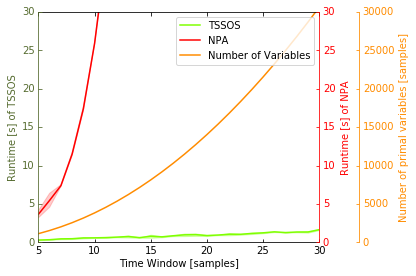

In [17]:
#pdf = PdfPages('cut_figure.pdf') 

fig = plt.figure(1)

#plt.style.use('bmh')

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)


host.axis['top'].set_visible(True)
host.axis["right"].set_visible(False)
host.axis["bottom"].set_visible(True)

par1.axis["right"].set_visible(True)
par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

offset = (40, 0)
new_axisline = par2._grid_helper.new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)
host.set_xlim(5, 30)
host.set_ylim(0, 30)
par1.set_ylim(0, 30)
par2.set_ylim(0, 30000)


host.set_xlabel("Time Window [samples]")
host.set_ylabel("Runtime [s] of TSSOS")
par1.set_ylabel("Runtime [s] of NPA")
par2.set_ylabel("Number of primal variables [samples]")


pA, = host.plot(range(5,31),tssos[0], linestyle='-',label="TSSOS",color="chartreuse")
pAsdpa, = par1.plot(range(5,15),sdpa_es[0], linestyle='-',label="NPA",color="r")
p2, = par2.plot(range(5,31),sdpa[2], label="Number of Variables",color="darkorange")

plt.fill_between(range(5,31),tssos[0]-tssos[1], tssos[0]+tssos[1],color=pA.get_color(), alpha=0.3)

plt.fill_between(range(5,15),sdpa_es[0]-sdpa_es[1],sdpa_es[0]+sdpa_es[1],color=pAsdpa.get_color(), alpha=0.2)


host.legend(loc="best")

hostcolor="darkolivegreen"

host.axis["left"].label.set_color(hostcolor)
par1.axis["right"].label.set_color(pAsdpa.get_color())
par2.axis["right2"].label.set_color(p2.get_color())

host.axis["left"].major_ticks.set_color(hostcolor)
par1.axis['right'].major_ticks.set_color(pAsdpa.get_color())
par2.axis['right2'].major_ticks.set_color(p2.get_color())

host.axis["left"].major_ticklabels.set_color(hostcolor)
par1.axis['right'].major_ticklabels.set_color(pAsdpa.get_color())
par2.axis['right2'].major_ticklabels.set_color(p2.get_color())

host.axis["left"].line.set_color(hostcolor)
par1.axis['right'].line.set_color(pAsdpa.get_color())
par2.axis['right2'].line.set_color(p2.get_color())

fig.set_facecolor('white')

#plt.show()

plt.savefig('runtime.pdf', bbox_inches='tight') 
